# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [8]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [11]:
# 先執行 GridSearchCV 跑出最佳參數
parm = {'pca__n_components':[4 , 8,10 ,20 ,30 ,40 ] , 'logistic__alpha': np.logspace(-4, 4, 5)}
GSV = GridSearchCV(pipe , parm  , cv=5 , return_train_score=False , verbose=1)
GSV.fit(X_digits , y_digits)
print('-'*20)
print(GSV.best_score_)
print(GSV.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
--------------------
0.9098622717424945
{'logistic__alpha': 0.01, 'pca__n_components': 30}


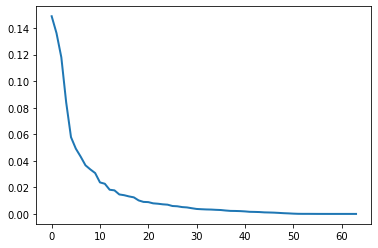

In [12]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)
plt.plot(pca.explained_variance_ratio_, linewidth=2)

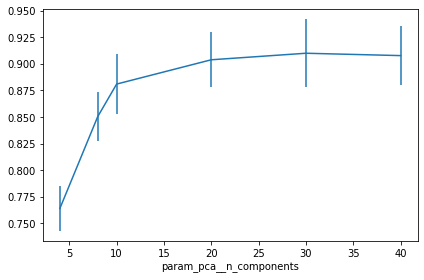

In [14]:
# 繪製不同採樣點的分類正確率
results = pd.DataFrame(GSV.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False )
# ax1.set_ylabel('Classification accuracy (val)')
# ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()